# ***Dataset Description***

The data used for this MModel includes a parallel dataset that contains 27,819 Amhari-Awngi sentence pairs. Amharic phrases, sentences, words  and their corresponding Awngi translations.  The file is an excel file.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
#df = pd.read_csv('amharic_awngi_data.xlsx', encoding=encoding)
df=pd.read_excel("/content/drive/My Drive/Amharic-Awngi/Data/Total-Awngi-Amharic_2.xlsx")
df.head()
#df = pd.read_csv('amharic_awngi_corpus.csv', encoding=encoding)
#df.head()

,Awngi,Amharic
0,ቻኺ ጝና ካዃ,መፀዳጃ ቤት ሄዱ፡፡
1,ዴንቡሳ ስዮ ሴዩና,የደንብ ልብሳቸውን ለበሱ፡፡
2,ታፎስታ እላፎ ቑሲና,እጃቸውንና ፊታቸውን ታጠቡ፡፡
3,ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።,ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡
4,ትምርት ጝናሾ ካሱና።,ወደ ትምህርት ቤት ሄዱ፡፡


In [ ]:
df.rename(columns={"Awngi ":"Awngi"},inplace=True)
df["Awngi"]=df["Awngi"].fillna(df["Awngi"].mode()[0])
df.head()

,Awngi,Amharic
0,ቻኺ ጝና ካዃ,መፀዳጃ ቤት ሄዱ፡፡
1,ዴንቡሳ ስዮ ሴዩና,የደንብ ልብሳቸውን ለበሱ፡፡
2,ታፎስታ እላፎ ቑሲና,እጃቸውንና ፊታቸውን ታጠቡ፡፡
3,ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።,ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡
4,ትምርት ጝናሾ ካሱና።,ወደ ትምህርት ቤት ሄዱ፡፡


Clean the text by removing punctuation symbols and numbers, converting characters to lowercase, and replacing Unicode characters with their ASCII equivalents: but it difficult to Know the ascii equivalent of Amharic and Awngi letters.

In [ ]:
import re
from unicodedata import normalize

def clean_text(text):
    text = normalize('NFD', text.lower())
    #text = re.sub('[^A-Za-z ]+', '', text)
    return text
df3=df.copy()
df['Awngi'] = df['Awngi'].apply(lambda row: clean_text(row))
df['Amharic'] = df['Amharic'].apply(lambda row: clean_text(row))

df.head()

,Awngi,Amharic
0,ቻኺ ጝና ካዃ,መፀዳጃ ቤት ሄዱ፡፡
1,ዴንቡሳ ስዮ ሴዩና,የደንብ ልብሳቸውን ለበሱ፡፡
2,ታፎስታ እላፎ ቑሲና,እጃቸውንና ፊታቸውን ታጠቡ፡፡
3,ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።,ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡
4,ትምርት ጝናሾ ካሱና።,ወደ ትምህርት ቤት ሄዱ፡፡


The next step is to scan the phrases and determine the maximum length of the Amharic phrases and then of the Awngi phrases. These lengths will determine the lengths of the sequences input to and output from the model:

In [ ]:
am = df['Amharic']
aw = df['Awngi']

am_max_len = max(len(line.split()) for line in am)
aw_max_len = max(len(line.split()) for line in aw)

print(f'Max phrase length (Amharic): {am_max_len}')
print(f'Max phrase length (Awngi): {aw_max_len}')

Max phrase length (Amharic): 75
Max phrase length (Awngi): 75


Now fit one `Tokenizer` to the Amharic phrases and another `Tokenizer` to their Awngi equivalents, and generate padded sequences for all the phrases:

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

aw_tokenizer = Tokenizer()
aw_tokenizer.fit_on_texts(aw)
aw_sequences = aw_tokenizer.texts_to_sequences(aw)
aw_x = pad_sequences(aw_sequences, maxlen=aw_max_len, padding='post')

am_tokenizer = Tokenizer()
am_tokenizer.fit_on_texts(am)
am_sequences = am_tokenizer.texts_to_sequences(am)
am_y = pad_sequences(am_sequences, maxlen=am_max_len, padding='post')

In [ ]:
aw_x[:2]

array([[6700,   27, 6701,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 868,   97, 6702,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,

Compute the vocabulary sizes from the `Tokenizer` instances:

In [ ]:
am_vocab_size = len(am_tokenizer.word_index) + 1
aw_vocab_size = len(aw_tokenizer.word_index) + 1

print(f'Vocabulary size (Amharic): {am_vocab_size}')
print(f'Vocabulary size (Awngi): {aw_vocab_size}')

Vocabulary size (Amharic): 13082
Vocabulary size (Awngi): 12664


## Build and train a model

Now it's time to define a model. We'll start with an `Embedding` layer followed by an `LSTM` layer that encodes Amharic Words,phrases and sentence input to the model. A second `LSTM` layer decodes those phrases into their Awngi equivalents. In between is a `RepeatVector` layer whose purpose is to reshape the output from the first `LSTM` layer for input to the second. The final layer is a softmax classification layer that outputs probabilities for each word in the Awngi vocabulary. The `TimeDistributed` wrapper ensures that the model outputs a set of probabilities for each token (word) in the output rather than just one set for the entire sequence.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, RepeatVector, TimeDistributed, Dropout

np.random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(Embedding(aw_vocab_size, 256, input_length=aw_max_len, mask_zero=True))
model.add(LSTM(256))
model.add(RepeatVector(am_max_len))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.4))
model.add(TimeDistributed(Dense(am_vocab_size, activation='softmax')))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary(line_length=100)

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 embedding (Embedding)                       (None, 75, 256)                         3241984        
                                                                                                    
 lstm (LSTM)                                 (None, 256)                             525312         
                                                                                                    
 repeat_vector (RepeatVector)                (None, 75, 256)                         0              
                                                                                                    
 lstm_1 (LSTM)                               (None, 75, 256)                         525312         
                                                                       

Train the model, and use an `EarlyStopping` callback to end training if the validation accuracy fails to improve for three consecutive epochs:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
hist = model.fit(aw_x, am_y, epochs=50, batch_size=50, validation_split=0.2, callbacks=[callback])

Epoch 1/50
446/446 [==============================] - 68s 130ms/step - loss: 1.0669 - accuracy: 0.9174 - val_loss: 0.6089 - val_accuracy: 0.9335
Epoch 2/50
446/446 [==============================] - 48s 107ms/step - loss: 0.7574 - accuracy: 0.9180 - val_loss: 0.7137 - val_accuracy: 0.9293
Epoch 3/50
446/446 [==============================] - 44s 98ms/step - loss: 0.7292 - accuracy: 0.9242 - val_loss: 0.5556 - val_accuracy: 0.9343
Epoch 4/50
446/446 [==============================] - 43s 96ms/step - loss: 0.6100 - accuracy: 0.9257 - val_loss: 0.5387 - val_accuracy: 0.9345
Epoch 5/50
446/446 [==============================] - 43s 96ms/step - loss: 0.5890 - accuracy: 0.9259 - val_loss: 0.5206 - val_accuracy: 0.9344
Epoch 6/50
446/446 [==============================] - 44s 99ms/step - loss: 0.5684 - accuracy: 0.9261 - val_loss: 0.5088 - val_accuracy: 0.9348
Epoch 7/50
446/446 [==============================] - 44s 99ms/step - loss: 0.5484 - accuracy: 0.9264 - val_loss: 0.4866 - val_accurac

# ***Save The Model***

In [ ]:
model.save('/content/drive/My Drive/Amharic-Awngi/Models/Awngi-Amharic-LSTM_translation_model_june23_and_24.h5')

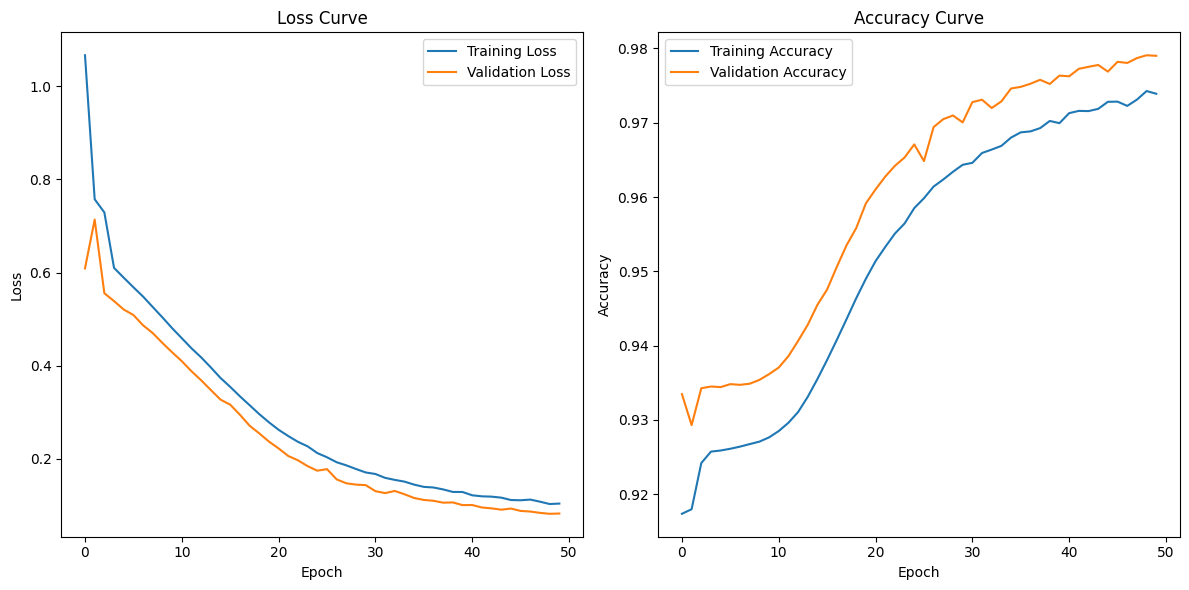

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy curves
plt.figure(figsize=(12,6))

# Loss Curve
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()

# Accuracy Curve
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.tight_layout()
plt.show()

Plot the per-epoch training and validation accuracy:

[]

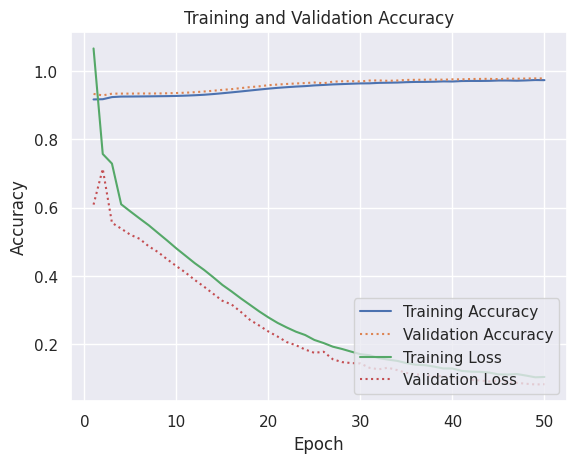

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val, ':', label='Validation Accuracy')
plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val_loss, ':', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

# ***Evaluate the performance of the model***

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

aw_tokenizer = Tokenizer()
aw_tokenizer.fit_on_texts(aw)
aw_sequences = aw_tokenizer.texts_to_sequences(aw)
aw_x = pad_sequences(aw_sequences, maxlen=aw_max_len, padding='post')

am_tokenizer = Tokenizer()
am_tokenizer.fit_on_texts(am)
am_sequences = am_tokenizer.texts_to_sequences(am)
am_y = pad_sequences(am_sequences, maxlen=am_max_len, padding='post')

In [ ]:
# Assuming 'am_x' and 'aw_y' are your input data
import numpy as np

# Get the total number of samples
total_samples = len(aw_x)

# Calculate the number of samples for training and testing
train_samples = int(0.8 * total_samples)  # 80% for training
test_samples = total_samples - train_samples  # 20% for testing

# Split the data into training and testing sets
X_train = aw_x[:train_samples]
X_test = aw_x[train_samples:]
y_train = am_y[:train_samples]
y_test = am_y[train_samples:]

# Verify the split
print(f"Total samples: {total_samples}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Total samples: 27818
Training samples: 22254
Testing samples: 5564


## Use the model to translate text

Can the model really translate Amharic to Awngi? Use a subset of the phrases reserved to validate the model to make predictions and see for yourself. Note the use of the French `Tokenizer`’s `sequences_to_texts` method to convert sequences representing French phrases predicted by the model into words:

In [ ]:
def translate_text(text, model, aw_tokenizer, am_tokenizer, aw_max_len):
    sequence = aw_tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=aw_max_len, padding='post')
    prediction = model.predict(padded_sequence, verbose=0)[0]
    indexes = [np.argmax(idx) for idx in prediction]
    return am_tokenizer.sequences_to_texts([indexes])[0]

texts = aw[1:500].values

for text in texts:
    translated = translate_text(text, model, aw_tokenizer, am_tokenizer, aw_max_len)
    print(f'{text} => {translated}')

ዴንቡሳ ስዮ ሴዩና => የደንብ ልብሳቸውን ለበሱ፡፡
ታፎስታ እላፎ ቑሲና => እጃቸውንና ፊታቸውን ታጠቡ፡፡
ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና። => ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡
ትምርት ጝናሾ ካሱና። => ወደ ትምህርት ቤት ሄዱ፡፡
ሳቄናዴስ ጁና። => ከእንቅልፋቸው ተነሱ፡፡
ቦርሳዋ እሚና => ቦርሳቸውን ያዙ፡፡
ፒያሳኩ ጀርካ ክርፅካ ኣኽጝስ ቸጌርስትኹሳ እርዳታና። => የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡
ኢቶጵያ ጅግንካት ኣጌራ ጉ ዳዴኽካት ጋቲቲ። => ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡
ሰኣዳ ክትፃንታ ጉ ሐኪማ ጋቲቲ። => ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡
ፍታኒ ታምባ ኣኽጝስ ኣንቤብጝ ዝኮ => ፈተና ደርሷል ስለዚህ ማንበብ አለብኝ፡፡
ይሳኮር ሜፃፎ ኣንቤብጞ እንካኑስ ክድስት ዴሜካ ፊልሞ ካንትጞ እንካንቴ => ይሳኮር መፅሐፍ ማንበብ ሲወድ ቅድስት ግን ግን ማየት ትመርጣለች፡፡
ኣዲስ ኣባባ ቱሪስትቲ ስፍራ ታኹኒኪላ ዳላፊቲ መዝናኝው ስፍሩ እላኪ => አዲስ አበባ የቱሪስት መዳረሻ ብትሆንም በቂ የመዝናኛ ስፍራዎች የሏትም፡፡
ምስሌ ታሪኮ ቹኒቲካማ ካቪካማ ድብስታና => ተመሳሳይ ታሪክ አዳምጣችሁ በድጋሜ ትናገራላችሁ፡፡
ዴዴኝካ ንባብካዋ ኪሊቲፍኝፂካማ ኣንቤባ => አጫጭር ምንባቦችን አቀላጥፋችሁ አንብቡ
ካልካስ ሊሊትጜስታ ምስሌ ኽዮ እያን። => ለቃላት ተቃራኒና ተመሳሳይ ፍች ስጡ
ቱስታውሳ ትኩሜ ቲኪምስቲካማ ዴብቴርቶ ፃፋን => ስርዓተ ነጥቦችን ተጠቅማችሁ አረፍተ ነገር ፃፉ
ክርፂ ወሌንት ዝኩኽ ኣኽቱሳ ሕይወቶ ይስኝፄ። => በመልካም ጉርብትና መኖር የሰዎችን ማህበራዊ ህይወት ያጠነክራል፡፡
ጝናኻዳ ሌንጌዳ ቻቤልካ እስቱኩ ወይዛሮ ሃያትኽ። => በቤታቸው 

# ***BLEU for LSTM MOdel***

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sacrebleu.metrics import BLEU

# Load the trained GRU model
model1 = load_model('/content/drive/My Drive/Amharic-Awngi/Models/Awngi-Amharic-LSTM_translation_model_june22.h5')

In [ ]:
!pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
import sacrebleu

def translate_text(text, model, aw_tokenizer, am_tokenizer, aw_max_len):
    sequence = aw_tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=aw_max_len, padding='post')
    prediction = model.predict(padded_sequence, verbose=0)[0]
    indexes = [np.argmax(idx) for idx in prediction]
    return am_tokenizer.sequences_to_texts([indexes])[0]

def calculate_bleu_score(reference_texts, candidate_texts):
    """
    Calculate the average BLEU score between the reference texts and the candidate texts.
    """
    total_bleu_score = 0
    for reference, candidate in zip(reference_texts, candidate_texts):
        bleu = sacrebleu.corpus_bleu([candidate], [[reference]])
        total_bleu_score += bleu.score

    average_bleu_score = total_bleu_score / len(reference_texts)
    print(f"Total BLEU score: {total_bleu_score:.2f}")
    return average_bleu_score

# Store the reference Awngi texts and the candidate translated texts
reference_texts = aw[1:10].values
candidate_texts = []

for text in aw[1:10].values:
    translated = translate_text(text, model, aw_tokenizer, am_tokenizer, aw_max_len)
    candidate_texts.append(translated)
    print(f'{text} => {translated}')

# Calculate the average BLEU score
average_bleu_score = calculate_bleu_score(reference_texts, candidate_texts)
print(f"Average BLEU score: {average_bleu_score:.2f}")


ዴንቡሳ ስዮ ሴዩና => የደንብ ልብሳቸውን ለበሱ፡፡
ታፎስታ እላፎ ቑሲና => እጃቸውንና ፊታቸውን ታጠቡ፡፡
ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና። => ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡
ትምርት ጝናሾ ካሱና። => ወደ ትምህርት ቤት ሄዱ፡፡
ሳቄናዴስ ጁና። => ከእንቅልፋቸው ተነሱ፡፡
ቦርሳዋ እሚና => ቦርሳቸውን ያዙ፡፡
ፒያሳኩ ጀርካ ክርፅካ ኣኽጝስ ቸጌርስትኹሳ እርዳታና። => የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡
ኢቶጵያ ጅግንካት ኣጌራ ጉ ዳዴኽካት ጋቲቲ። => ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡
ሰኣዳ ክትፃንታ ጉ ሐኪማ ጋቲቲ። => ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡
Total BLEU score: 0.00
Average BLEU score: 0.00


Finally, see how the model translates "Hello world" into French:

In [ ]:
translate_text('ዴንቡሳ ስዮ ሴዩና፡', model, aw_tokenizer, am_tokenizer, aw_max_len)

In [ ]:
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
from tensorflow.keras.preprocessing.sequence import pad_sequences

def translate_text(text, model, aw_tokenizer, am_tokenizer, aw_max_len):
    sequence = aw_tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=aw_max_len, padding='post')
    prediction = model.predict(padded_sequence, verbose=0)[0]
    indexes = [np.argmax(idx) for idx in prediction]
    return am_tokenizer.sequences_to_texts([indexes])[0]

# Example reference and translation texts
texts = aw[1:500].values
references = am[1:500].values  # Assuming you have the corresponding Awngi sentences

# Calculate BLEU scores
for text, reference in zip(texts, references):
    translated = translate_text(text, model, aw_tokenizer, am_tokenizer, aw_max_len)
    reference_tokens = reference.split()
    translated_tokens = translated.split()
    bleu_score = sentence_bleu([reference_tokens], translated_tokens)

    print(f'{text} => {translated}')
    print(f'Reference: {reference}')
    print(f'BLEU score: {bleu_score:.4f}')

ዴንቡሳ ስዮ ሴዩና => የደንብ ልብሳቸውን ለበሱ፡፡
Reference: የደንብ ልብሳቸውን ለበሱ፡፡
BLEU score: 0.0000
ታፎስታ እላፎ ቑሲና => እጃቸውንና ፊታቸውን ታጠቡ፡፡
Reference: እጃቸውንና ፊታቸውን ታጠቡ፡፡
BLEU score: 0.0000
ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና። => ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡
Reference: ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦርሳቸው ከተቱ፡፡
BLEU score: 1.0000
ትምርት ጝናሾ ካሱና። => ወደ ትምህርት ቤት ሄዱ፡፡
Reference: ወደ ትምህርት ቤት ሄዱ፡፡
BLEU score: 1.0000
ሳቄናዴስ ጁና። => ከእንቅልፋቸው ተነሱ፡፡
Reference: ከእንቅልፋቸው ተነሱ፡፡
BLEU score: 0.0000
ቦርሳዋ እሚና => ቦርሳቸውን ያዙ፡፡
Reference: ቦርሳቸውን ያዙ፡፡
BLEU score: 0.0000
ፒያሳኩ ጀርካ ክርፅካ ኣኽጝስ ቸጌርስትኹሳ እርዳታና። => የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡
Reference: የፒያሳ ልጆች መልካሞች ስለሆኑ የተቸገረን ይረዳሉ፡፡
BLEU score: 1.0000
ኢቶጵያ ጅግንካት ኣጌራ ጉ ዳዴኽካት ጋቲቲ። => ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡
Reference: ኢትዮጵያ የጀግኖች ሀገር እንጂ የሌቦች አይደለችም፡፡
BLEU score: 1.0000
ሰኣዳ ክትፃንታ ጉ ሐኪማ ጋቲቲ። => ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡
Reference: ሰአዳ መምህር እንጂ ሃኪም አይደለችም፡፡
BLEU score: 1.0000


## ***Transformer Network***

In [ ]:
import re
from unicodedata import normalize


def clean_and_prepare_text(text):
    text = '[start] ' + clean_text(text) + ' [end]'
    return text

df['Awngi'] = df['Awngi'].apply(lambda row: clean_text(row))
df['Amharic'] = df['Amharic'].apply(lambda row: clean_and_prepare_text(row))
df.head()

,Awngi,Amharic
0,ቻኺ ጝና ካዃ,[start] መፀዳጃ ቤት ሄዱ፡፡ [end]
1,ዴንቡሳ ስዮ ሴዩና,[start] የደንብ ልብሳቸውን ለበሱ፡፡ [end]
2,ታፎስታ እላፎ ቑሲና,[start] እጃቸውንና ፊታቸውን ታጠቡ፡፡ [end]
3,ዴብቴሮ፡ ሜፃፎ፡እርሳሶስታ እስክርቢቶ ቦርሳሾ ኬቴቱና።,[start] ደብተራቸውን፣ መፅሃፋቸውን፣ እርሳስና እስክርቢቷቸውን ወደ ቦ...
4,ትምርት ጝናሾ ካሱና።,[start] ወደ ትምህርት ቤት ሄዱ፡፡ [end]


In [ ]:
am = df['Amharic']
aw = df['Awngi']

am_max_len = max(len(line.split()) for line in am)
aw_max_len = max(len(line.split()) for line in aw)
sequence_len = max(aw_max_len, am_max_len)

print(f'Max phrase length (Amharic): {am_max_len}')
print(f'Max phrase length (Awngi): {aw_max_len}')
print(f'Sequence length: {sequence_len}')

Max phrase length (Amharic): 77
Max phrase length (Awngi): 75
Sequence length: 77


In [ ]:
from typing_extensions import Awaitable
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

aw_tokenizer = Tokenizer()
aw_tokenizer.fit_on_texts(aw)
aw_sequences = aw_tokenizer.texts_to_sequences(aw)
aw_x = pad_sequences(aw_sequences, maxlen=sequence_len, padding='post')

am_tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@\\^_`{|}~\t\n')
am_tokenizer.fit_on_texts(am)
am_sequences = am_tokenizer.texts_to_sequences(am)
am_y = pad_sequences(am_sequences, maxlen=sequence_len + 1, padding='post')

In [ ]:
am_vocab_size = len(am_tokenizer.word_index) + 1
aw_vocab_size = len(aw_tokenizer.word_index) + 1

print(f'Vocabulary size (Amharic): {am_vocab_size}')
print(f'Vocabulary size (Awngi): {aw_vocab_size}')

Vocabulary size (Amharic): 13084
Vocabulary size (Awngi): 12664


In [ ]:
inputs = { 'encoder_input': aw_x, 'decoder_input':am_y[:, :-1] }
outputs = am_y[:, 1:]

In [ ]:
!pip install keras_nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Suc

In [ ]:
#!pip install keras_nlp
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras_nlp.layers import TokenAndPositionEmbedding, TransformerEncoder
from keras_nlp.layers import TransformerDecoder

np.random.seed(42)
tf.random.set_seed(42)

num_heads = 8
embed_dim = 256

encoder_input = Input(shape=(None,), dtype='int64', name='encoder_input')
x = TokenAndPositionEmbedding(aw_vocab_size, sequence_len, embed_dim)(encoder_input)
encoder_output = TransformerEncoder(embed_dim, num_heads)(x)
encoded_seq_input = Input(shape=(None, embed_dim))

decoder_input = Input(shape=(None,), dtype='int64', name='decoder_input')
x = TokenAndPositionEmbedding(am_vocab_size, sequence_len, embed_dim, mask_zero=True)(decoder_input)
x = TransformerDecoder(embed_dim, num_heads)(x, encoded_seq_input)
x = Dropout(0.4)(x)

decoder_output = Dense(am_vocab_size, activation='softmax')(x)
decoder = Model([decoder_input, encoded_seq_input], decoder_output)
decoder_output = decoder([decoder_input, encoder_output])

model1 = Model([encoder_input, decoder_input], decoder_output)
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary(line_length=120)

Using TensorFlow backend
Model: "model_1"
________________________________________________________________________________________________________________________
 Layer (type)                       Output Shape                        Param #     Connected to                        
 encoder_input (InputLayer)         [(None, None)]                      0           []                                  
                                                                                                                        
 token_and_position_embedding (Tok  (None, None, 256)                   3261696     ['encoder_input[0][0]']             
 enAndPositionEmbedding)                                                                                                
                                                                                                                        
 decoder_input (InputLayer)         [(None, None)]                      0           []                         

In [ ]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 token_and_position_embeddi  (None, None, 256)            3261696   ['encoder_input[0][0]']       
 ng (TokenAndPositionEmbedd                                                                       
 ing)                                                                                             
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                            

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
hist1 = model1.fit(inputs, outputs, epochs=50, validation_split=0.2, callbacks=[callback])

NameError: name 'model1' is not defined

In [ ]:
model1.save('/content/drive/My Drive/Amharic-Awngi/Models/Awngi-Amharic-Transformer_Model_translation_model_June23_And_24_3.h5')

NameError: name 'model1' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist1.history['accuracy']
val = hist1.history['val_accuracy']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val, ':', label='Validation Accuracy')
plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val_loss, ':', label='Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
def translate_text(text, model, aw_tokenizer, am_tokenizer, am_index_lookup, sequence_len):
    input_sequence = aw_tokenizer.texts_to_sequences([text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    decoded_text = '[start]'

    for i in range(sequence_len):
        target_sequence = am_tokenizer.texts_to_sequences([decoded_text])
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]

        prediction = model([padded_input_sequence, padded_target_sequence])

        idx = np.argmax(prediction[0, i, :]) - 1
        token = am_index_lookup[idx]
        decoded_text += ' ' + token

        if token == '[end]':
            break

    return decoded_text[8:-6] # Remove [start] and [end] tokens

am_vocab = am_tokenizer.word_index
am_index_lookup = dict(zip(range(len(am_vocab)), am_vocab))
texts = aw[1:5000].values

for text in texts:
    translated = translate_text(text, model1, aw_tokenizer, am_tokenizer, am_index_lookup, sequence_len)
    #print(f'{text} => {translated}')

In [ ]:
translate_text('እጃቸውንና ፊታቸውን ታጠቡ፡፡', model1, aw_tokenizer, am_tokenizer, am_index_lookup, sequence_len)

In [ ]:
!pip install sacrebleu
import sacrebleu

def translate_text(text, model, aw_tokenizer, am_tokenizer, am_index_lookup, sequence_len):
    input_sequence = aw_tokenizer.texts_to_sequences([text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=sequence_len, padding='post')
    decoded_text = '[start]'

    for i in range(sequence_len):
        target_sequence = am_tokenizer.texts_to_sequences([decoded_text])
        padded_target_sequence = pad_sequences(target_sequence, maxlen=sequence_len, padding='post')[:, :-1]

        prediction = model([padded_input_sequence, padded_target_sequence])

        idx = np.argmax(prediction[0, i, :]) - 1
        token = am_index_lookup[idx]
        decoded_text += ' ' + token

        if token == '[end]':
            break

    return decoded_text[8:-6] # Remove [start] and [end] tokens

def calculate_bleu_score(reference_texts, candidate_texts):
    """
    Calculate the average BLEU score between the reference texts and the candidate texts.
    """
    total_bleu_score = 0
    for reference, candidate in zip(reference_texts, candidate_texts):
        bleu = sacrebleu.corpus_bleu([candidate], [[reference]])
        total_bleu_score += bleu.score

    average_bleu_score = total_bleu_score / len(reference_texts)
    return average_bleu_score

# Store the reference French texts and the candidate translated texts
reference_texts = am[1:500].values
candidate_texts = []

for text in aw[1:500].values:
    translated = translate_text(text, model1, aw_tokenizer, am_tokenizer, am_index_lookup, sequence_len)
    candidate_texts.append(translated)
    print(f'{text} => {translated}')

# Calculate the average BLEU score
average_bleu_score = calculate_bleu_score(reference_texts, candidate_texts)
print(f"Average BLEU score: {average_bleu_score:.2f}")